<a href="https://colab.research.google.com/github/Madhavtib/NLP/blob/main/AI_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter30k_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   twitts     30000 non-null  object
 1   sentiment  30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


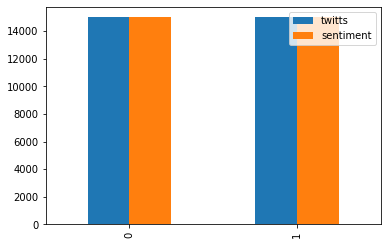

In [ ]:
positive=df.loc[df['sentiment']==1].count()
negative=df.loc[df['sentiment']==1].count()
df1=pd.DataFrame([positive,negative])
df1.plot.bar() #equal number of positive and negative sentiments

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
x=df['twitts']
y=df['sentiment']
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,2)) #using term frequency method for analysis and tokenization
x=tfidf.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((24000, 10000), (6000, 10000))

In [ ]:
y_train.shape,y_test.shape

((24000,), (6000,))

In [ ]:
model=LinearSVC()
model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred=model.predict(x_test) 

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      3016
           1       0.74      0.77      0.76      2984

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000



In [ ]:
pred=input()
vec=tfidf.transform([pred])

I am doing great


In [ ]:
if model.predict(vec)[0]==1:
  print("Positive Sentiment")
else:
  print("Negative Sentiment")

Positive Sentiment
